In [1]:
import tables as tb
import pandas as pd
from glob import glob
import re
import os
from invisible_cities.core  .configure import configure
import sys
import invisible_cities.io.dst_io as dio
from invisible_cities.io.table_io import make_table
from invisible_cities.cities.components import index_tables

import numpy as np

Antes de mirar un poco ISAURA miré q tal los archivos completos a ver que tal y eso :)

In [8]:
MC_all_path = 'h5files/merged_MC_label_4mm.h5'
be_all_path = 'h5files/merged_beersheba_label_4mm_without_groups.h5'

In [9]:
with tb.open_file(MC_all_path, 'r') as h5in:
    print(h5in)

h5files/merged_MC_label_4mm.h5 (File) ''
Last modif.: 'Mon Mar  7 14:18:23 2022'
Object Tree: 
/ (RootGroup) ''
/DATASET (Group) ''
/DATASET/BinsInfo (Table(1,), shuffle, zlib(4)) ''
/DATASET/EventsInfo (Table(795649,), shuffle, zlib(4)) ''
/DATASET/MCVoxels (Table(43306255,), shuffle, zlib(4)) ''



In [10]:
with tb.open_file(be_all_path, 'r') as h5in:
    print(h5in)

h5files/merged_beersheba_label_4mm_without_groups.h5 (File) ''
Last modif.: 'Tue Mar  8 18:40:34 2022'
Object Tree: 
/ (RootGroup) ''
/DATASET (Group) ''
/DATASET/BeershebaVoxels (Table(160350134,), shuffle, zlib(4)) ''
/DATASET/BinsInfo (Table(1,), shuffle, zlib(4)) ''
/DATASET/EventsInfo (Table(795649,), shuffle, zlib(4)) ''



In [15]:
all_MC_data = dio.load_dst(MC_all_path, 'DATASET', 'MCVoxels')

In [17]:
all_MC_data

,x,y,z,ener,ratio,segclass,binclass,dataset_id
0,33,80,28,0.025630,1.0,2,0,0
1,33,80,29,0.020061,1.0,2,0,0
2,33,80,30,0.017959,1.0,2,0,0
3,33,80,31,0.014008,1.0,2,0,0
4,33,80,32,0.019665,1.0,2,0,0
...,...,...,...,...,...,...,...,...
43306250,78,34,26,0.010581,1.0,2,0,795648
43306251,79,30,28,0.035626,1.0,2,0,795648
43306252,79,30,29,0.005775,1.0,2,0,795648
43306253,79,31,29,0.040187,1.0,2,0,795648


In [11]:
all_be_data = dio.load_dst(be_all_path, 'DATASET', 'BeershebaVoxels')

In [14]:
all_be_data

,xbin,ybin,zbin,energy,binclass,MC_ener,ratio,segclass,dataset_id
0,32,80,39,0.000171,0,NaN,NaN,5,0
1,32,81,39,0.000538,0,NaN,NaN,5,0
2,33,79,27,0.005764,0,NaN,NaN,5,0
3,33,79,28,0.003167,0,NaN,NaN,5,0
4,33,79,29,0.000714,0,NaN,NaN,5,0
...,...,...,...,...,...,...,...,...,...
160350129,79,32,31,0.000664,0,NaN,NaN,5,795648
160350130,79,33,26,0.002264,0,NaN,NaN,5,795648
160350131,79,34,26,0.000321,0,NaN,NaN,5,795648
160350132,80,30,30,0.000152,0,NaN,NaN,5,795648


In [7]:
all_MC_eves = dio.load_dst(MC_all_path, 'DATASET', 'EventsInfo')
all_be_eves = dio.load_dst(be_all_path, 'DATASET', 'EventsInfo')

In [12]:
all_MC_eves

,event_id,binclass,dataset_id,pathname,basename,label_pathname,label_basename
0,0,0,0,/mnt/lustre/scratch/home/usc/ie/mpm/data_produ...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.beershe...,/mnt/lustre/scratch/home/usc/ie/mpm/beersh_lab...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.beershe...
1,1,0,1,/mnt/lustre/scratch/home/usc/ie/mpm/data_produ...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.beershe...,/mnt/lustre/scratch/home/usc/ie/mpm/beersh_lab...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.beershe...
2,2,0,2,/mnt/lustre/scratch/home/usc/ie/mpm/data_produ...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.beershe...,/mnt/lustre/scratch/home/usc/ie/mpm/beersh_lab...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.beershe...
3,3,0,3,/mnt/lustre/scratch/home/usc/ie/mpm/data_produ...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.beershe...,/mnt/lustre/scratch/home/usc/ie/mpm/beersh_lab...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.beershe...
4,4,0,4,/mnt/lustre/scratch/home/usc/ie/mpm/data_produ...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.beershe...,/mnt/lustre/scratch/home/usc/ie/mpm/beersh_lab...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.beershe...
...,...,...,...,...,...,...,...
795644,798000952,0,795644,/mnt/lustre/scratch/home/usc/ie/mpm/data_produ...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut399.beers...,/mnt/lustre/scratch/home/usc/ie/mpm/beersh_lab...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut399.beers...
795645,798000953,1,795645,/mnt/lustre/scratch/home/usc/ie/mpm/data_produ...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut399.beers...,/mnt/lustre/scratch/home/usc/ie/mpm/beersh_lab...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut399.beers...
795646,798000954,0,795646,/mnt/lustre/scratch/home/usc/ie/mpm/data_produ...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut399.beers...,/mnt/lustre/scratch/home/usc/ie/mpm/beersh_lab...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut399.beers...
795647,798000955,0,795647,/mnt/lustre/scratch/home/usc/ie/mpm/data_produ...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut399.beers...,/mnt/lustre/scratch/home/usc/ie/mpm/beersh_lab...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut399.beers...


In [9]:
all_be_eves

,event_id,binclass,dataset_id,pathname,basename,label_pathname,label_basename
0,0,0,0,/mnt/lustre/scratch/home/usc/ie/mpm/data_produ...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.beershe...,/mnt/lustre/scratch/home/usc/ie/mpm/beersh_lab...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.beershe...
1,1,0,1,/mnt/lustre/scratch/home/usc/ie/mpm/data_produ...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.beershe...,/mnt/lustre/scratch/home/usc/ie/mpm/beersh_lab...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.beershe...
2,2,0,2,/mnt/lustre/scratch/home/usc/ie/mpm/data_produ...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.beershe...,/mnt/lustre/scratch/home/usc/ie/mpm/beersh_lab...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.beershe...
3,3,0,3,/mnt/lustre/scratch/home/usc/ie/mpm/data_produ...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.beershe...,/mnt/lustre/scratch/home/usc/ie/mpm/beersh_lab...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.beershe...
4,4,0,4,/mnt/lustre/scratch/home/usc/ie/mpm/data_produ...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.beershe...,/mnt/lustre/scratch/home/usc/ie/mpm/beersh_lab...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.beershe...
...,...,...,...,...,...,...,...
795644,798000952,0,795644,/mnt/lustre/scratch/home/usc/ie/mpm/data_produ...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut399.beers...,/mnt/lustre/scratch/home/usc/ie/mpm/beersh_lab...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut399.beers...
795645,798000953,1,795645,/mnt/lustre/scratch/home/usc/ie/mpm/data_produ...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut399.beers...,/mnt/lustre/scratch/home/usc/ie/mpm/beersh_lab...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut399.beers...
795646,798000954,0,795646,/mnt/lustre/scratch/home/usc/ie/mpm/data_produ...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut399.beers...,/mnt/lustre/scratch/home/usc/ie/mpm/beersh_lab...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut399.beers...
795647,798000955,0,795647,/mnt/lustre/scratch/home/usc/ie/mpm/data_produ...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut399.beers...,/mnt/lustre/scratch/home/usc/ie/mpm/beersh_lab...,Tl208_NEW_v1_03_01_nexus_v5_03_04_cut399.beers...


In [2]:
all_data = 'h5files/train_dataset_5mm_all.h5'

In [3]:
all_vox = dio.load_dst(all_data, 'DATASET', 'Voxels')

In [4]:
all_vox

,xbin,ybin,zbin,energy,segclass,binclass,dataset_id
0,47,45,74,0.028918,1,0,0
1,43,48,78,0.043978,1,0,0
2,41,45,81,0.012179,1,0,0
3,49,46,74,0.005277,1,0,0
4,43,48,77,0.009145,1,0,0
...,...,...,...,...,...,...,...
34817573,19,33,68,0.049901,1,0,644244
34817574,19,31,68,0.018297,1,0,644244
34817575,19,33,69,0.005991,1,0,644244
34817576,16,35,70,0.032205,1,0,644244


In [49]:
all_vox_clean = all_vox.drop_duplicates() 
#RESULTA QUE HABIA UNOS 20000 EVENTOS Q ESTABAN GUARDADOS DOS VECES CADA UNO...

In [43]:
ev_ener = all_vox_clean.groupby('dataset_id').agg({'energy':[('ener', sum)]})

In [44]:
ev_ener.columns = ev_ener.columns.get_level_values(1)

In [45]:
ev_ener = ev_ener.reset_index()

In [46]:
import matplotlib.pyplot as plt

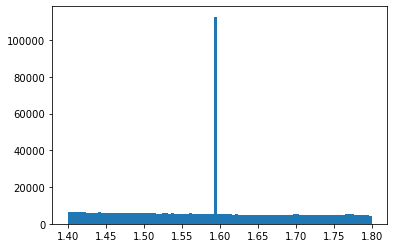

In [50]:
plt.hist(ev_ener.ener, bins = 100)
plt.show()

In [26]:
all_bininfo = dio.load_dst(all_data, 'DATASET', 'BinsInfo')

In [27]:
all_evinfo = dio.load_dst(all_data, 'DATASET', 'EventsInfo')

Aquí hice una prueba para normalizar las energías del dataset

In [13]:
event = all_vox[all_vox.dataset_id == 0]

In [14]:
event = event.assign(energy = event.energy / sum(event.energy))

In [15]:
sum(event.energy)

0.9999999999999999

In [16]:
event.energy

0      0.004465
1      0.004167
2      0.002159
3      0.003503
4      0.002968
         ...   
181    0.002592
182    0.001564
183    0.003380
184    0.018021
185    0.005636
Name: energy, Length: 186, dtype: float64

In [7]:
all_bininfo

,min_x,max_x,nbins_x,min_y,max_y,nbins_y,min_z,max_z,nbins_z,Rmax
0,-220,220,89,-220,220,89,0,550,111,220
